In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import pylab as plt
import glob
import os
import shutil
from pprint import pprint

In [3]:
import stephane.display.graphes as graphes
import stephane.tools.Smath as smath
import icewave.gps.gps as gps
import icewave.gps.garmin as garmin

Please install garmin package

/Volumes/


In [90]:
date = '2024_0211'
year,day = date.split('_')

base = '/Volumes/Share_hublot/'
folder = base+f"Data/{day}/GPS/"
filelist = glob.glob(folder+'*')

savefolder = folder#base + datesave + '/GPS/' 

pprint(filelist)

norme_folder = base + 'Nomenclature/'

filelist = glob.glob(folder+'*.gpx')
print(filelist)
filegpx = filelist[0]

#base = '/Users/stephane/Documents/git/icewave/icewave/field/Bicwin2024/Data/'
#date = '2024_0211'
#datesave=date.replace('_','/')
#savefolder = base + datesave + '/GPS/' 

import gpxpy

gpx_file = open(filegpx, 'r')
gpx = gpxpy.parse(gpx_file)
for track in gpx.tracks:
    for segment in track.segments:
        for point in segment.points:
            print('Point at ({0},{1}) -> {2}'.format(point.latitude, point.longitude, point.elevation))

for waypoint in gpx.waypoints:
    print('waypoint {0}, {1} -> ({2},{3})'.format(waypoint.name, waypoint.time.ctime(), waypoint.latitude, waypoint.longitude))

['/Volumes/Share_hublot/Data/0211/GPS/0000_2024-02-11 08_59_25.fit',
 '/Volumes/Share_hublot/Data/0211/GPS/0000_2024-02-11_08_59_25_Saguenay–Lac-Saint-Jean_Canada.pdf',
 '/Volumes/Share_hublot/Data/0211/GPS/0000_2024-02-11_08_59_25_Saguenay–Lac-Saint-Jean_Canada.pkl',
 '/Volumes/Share_hublot/Data/0211/GPS/0001_2024-02-11 09_12_48.fit',
 '/Volumes/Share_hublot/Data/0211/GPS/0001_2024-02-11_09_12_48_Saguenay–Lac-Saint-Jean_Canada.pdf',
 '/Volumes/Share_hublot/Data/0211/GPS/0001_2024-02-11_09_12_48_Saguenay–Lac-Saint-Jean_Canada.pkl',
 '/Volumes/Share_hublot/Data/0211/GPS/0002_2024-02-11 12_12_19.fit',
 '/Volumes/Share_hublot/Data/0211/GPS/0002_2024-02-11_12_12_19_Saguenay–Lac-Saint-Jean_Canada.pdf',
 '/Volumes/Share_hublot/Data/0211/GPS/0002_2024-02-11_12_12_19_Saguenay–Lac-Saint-Jean_Canada.pkl',
 '/Volumes/Share_hublot/Data/0211/GPS/0003_2024-02-11 12_33_24.fit',
 '/Volumes/Share_hublot/Data/0211/GPS/0003_2024-02-11_12_33_24_Saguenay–Lac-Saint-Jean_Canada.pdf',
 '/Volumes/Share_hublot/

In [91]:
np.asarray(gpx.waypoints)

array([GPXWaypoint(48.354159, -70.41197, elevation=27.651859, time=datetime.datetime(2024, 2, 11, 14, 0, 11, tzinfo=SimpleTZ("Z")), name='Sag240102', symbol='Flag, Blue'),
       GPXWaypoint(48.351689, -70.375057, elevation=11.319143, time=datetime.datetime(2024, 2, 11, 14, 8, 30, tzinfo=SimpleTZ("Z")), name='Sag240103', symbol='Flag, Blue'),
       GPXWaypoint(48.347114, -70.355861, elevation=13.281659, time=datetime.datetime(2024, 2, 11, 14, 13, 12, tzinfo=SimpleTZ("Z")), name='Sag240104', symbol='Flag, Blue'),
       GPXWaypoint(48.256069, -70.034441, elevation=-7.929217, time=datetime.datetime(2024, 2, 11, 17, 22, 43, tzinfo=SimpleTZ("Z")), name='Sag240105', symbol='Flag, Blue'),
       GPXWaypoint(48.255746, -70.044663, elevation=-8.689998, time=datetime.datetime(2024, 2, 11, 17, 28, 4, tzinfo=SimpleTZ("Z")), name='Sag240106', symbol='Flag, Blue'),
       GPXWaypoint(48.254961, -70.063102, elevation=17.09655, time=datetime.datetime(2024, 2, 11, 17, 34, tzinfo=SimpleTZ("Z")), name=

In [8]:
import icewave.geometry.tables as tables

#norme_folder = '/Users/stephane/Documents/git/Data_local/Nomenclature/'
norme = tables.read_norme(norme_folder)
print(norme)

{'depart': 'g*', 'fin': 'g*', 'G': 'g^', 'B': 'mo', 'T': 'rs', 'D': 'kp', 'H': 'bv', 'S': 'bo', 'Tomo': 'g>', 'Quin': 'gv', 'borne': 'ks', 'plot': 'rp', 'R': 'bs', 'Canot': 'yo', 'Frac': 'rx'}


/Users/stephane/Documents/git/icewave/icewave/geometry/tables.py:140: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  table = np.asarray([line.split('\t') for line in lines])


In [59]:
global norme

print(norme_folder)
print(glob.glob(norme_folder+'*.txt'))
table = tables.read_table(folder)
print(folder)

/Volumes/Share_hublot/Nomenclature/
['/Volumes/Share_hublot/Nomenclature/Nomenclature_GPS.txt', '/Volumes/Share_hublot/Nomenclature/Nomenclature_Name_UQAR.txt']
/Volumes/Share_hublot/Data/0211/GPS/


In [60]:
table

[[109, 'depart'],
 [110, 'plot_01'],
 [111, 'plot_03'],
 [112, 'plot_02'],
 [113, 'T_11'],
 [114, 'B_03'],
 [114, 'T_13'],
 [115, 'plot_04'],
 [118, 'B_02'],
 [117, 'B_04'],
 [116, 'borne_00'],
 [118, 'T_12'],
 [119, 'S_401'],
 [120, 'S_402'],
 [121, 'S_403'],
 [122, 'S_404'],
 [123, 'S_405'],
 [124, 'S_406'],
 [125, 'S_407'],
 [126, 'S_408'],
 [127, 'S_409'],
 [128, 'S_410'],
 [129, 'S_411'],
 [130, 'S_412'],
 [131, 'S_413'],
 [132, 'S_414'],
 [133, 'S_415'],
 [134, 'S_416'],
 [135, 'S_417'],
 [136, 'B_05'],
 [137, 'B_07'],
 [138, 'T_09'],
 [139, 'G_0511'],
 [140, 'G_0512'],
 [141, 'G_0504'],
 [142, 'G_0506'],
 [143, 'G_0516'],
 [144, 'G_0507'],
 [145, 'G_0502'],
 [146, 'G_0501'],
 [147, 'B_01'],
 [148, 'Canot_01'],
 [149, 'Canot_02']]

In [61]:
tomo_dict = {}
table_dict={}

for line in table:
    table_dict[line[0]]=line[1]
pprint(table_dict)

{109: 'depart',
 110: 'plot_01',
 111: 'plot_03',
 112: 'plot_02',
 113: 'T_11',
 114: 'T_13',
 115: 'plot_04',
 116: 'borne_00',
 117: 'B_04',
 118: 'T_12',
 119: 'S_401',
 120: 'S_402',
 121: 'S_403',
 122: 'S_404',
 123: 'S_405',
 124: 'S_406',
 125: 'S_407',
 126: 'S_408',
 127: 'S_409',
 128: 'S_410',
 129: 'S_411',
 130: 'S_412',
 131: 'S_413',
 132: 'S_414',
 133: 'S_415',
 134: 'S_416',
 135: 'S_417',
 136: 'B_05',
 137: 'B_07',
 138: 'T_09',
 139: 'G_0511',
 140: 'G_0512',
 141: 'G_0504',
 142: 'G_0506',
 143: 'G_0516',
 144: 'G_0507',
 145: 'G_0502',
 146: 'G_0501',
 147: 'B_01',
 148: 'Canot_01',
 149: 'Canot_02'}


In [62]:
f"{1:02d}"

'01'

In [76]:
indexes = np.arange(139,147)
indices = tables.select(gpx,139,146)
print(indices)


geo = {5:[4,6],3:[1,2],10:[7,16],15:[16,16,10],14:[16,10,10],9:[10,10,7],8:[7,7,10]}

tomo = {}
for i,ind in zip(indices,indexes):
    num = int(table_dict[ind].split('_')[1][2:])
    tomo[num]={}
    wpt = gpx.waypoints[i]
    
    print(num)
    
    tomo[num]['wpt']=wpt
    tomo[num]['name']=table_dict[ind]
    tomo[num]['latitude']=wpt.latitude
    tomo[num]['longitude']=wpt.longitude
    print(num,wpt.latitude,wpt.longitude)

    
print(geo.keys())
for key in geo.keys():
    tomo[key]={}
    tomo[key]['wpt']=None
    tomo[key]['name']='G_05'+f"{key:02d}"

    
    glist = geo[key]
    print(tomo.keys(),glist)
    lats = [tomo[g]['latitude'] for g in glist]
    lons = [tomo[g]['longitude'] for g in glist]
    
    tomo[key]['latitude']=np.mean(lats)
    tomo[key]['longitude']=np.mean(lons)
    
#do the 13 manually
key = 13
tomo[key]={}
tomo[key]['wpt']=None
tomo[key]['name']='G_05'+f"{key:02d}"

g1 = 11
g2 = 12

lats = [tomo[g2]['latitude'],tomo[g2]['latitude'],-tomo[g1]['latitude']]
lons = [tomo[g2]['longitude'],tomo[g2]['longitude'],-tomo[g1]['longitude']]

tomo[key]['latitude']=np.mean(lats)*3
tomo[key]['longitude']=np.mean(lons)*3

[37, 38, 39, 40, 41, 42, 43, 44]
11
11 48.252035 -70.09127
12
12 48.251834 -70.091233
4
4 48.25247 -70.091275
6
6 48.252457 -70.092084
16
16 48.252229 -70.092276
7
7 48.252247 -70.089863
2
2 48.252475 -70.09007
1
1 48.252462 -70.090867
dict_keys([5, 3, 10, 15, 14, 9, 8])
dict_keys([11, 12, 4, 6, 16, 7, 2, 1, 5]) [4, 6]
dict_keys([11, 12, 4, 6, 16, 7, 2, 1, 5, 3]) [1, 2]
dict_keys([11, 12, 4, 6, 16, 7, 2, 1, 5, 3, 10]) [7, 16]
dict_keys([11, 12, 4, 6, 16, 7, 2, 1, 5, 3, 10, 15]) [16, 16, 10]
dict_keys([11, 12, 4, 6, 16, 7, 2, 1, 5, 3, 10, 15, 14]) [16, 10, 10]
dict_keys([11, 12, 4, 6, 16, 7, 2, 1, 5, 3, 10, 15, 14, 9]) [10, 10, 7]
dict_keys([11, 12, 4, 6, 16, 7, 2, 1, 5, 3, 10, 15, 14, 9, 8]) [7, 7, 10]


In [92]:
savefolder

'/Volumes/Share_hublot/Data/0211/GPS/'

In [93]:
#pprint(tomo)
import icewave.tools.rw_data as rw_data

filename = savefolder+'Quinconce_GPS.pkl'
rw_data.write_pkl(filename,tomo)

(0.3052988981944445, 0.30530627125, 0.34656355807843525, 0.3465674219498283)

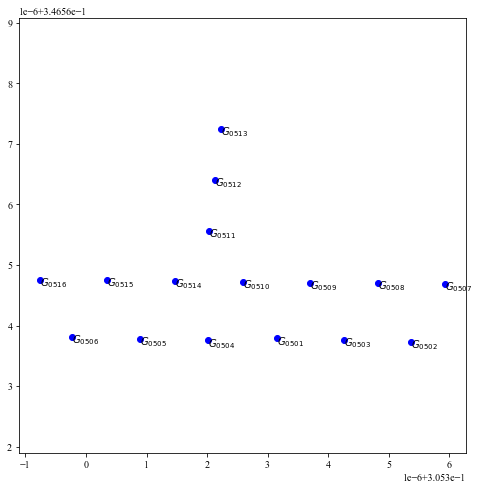

In [86]:
fig,ax = plt.subplots(figsize=(8,8))
for key in tomo.keys():
    name = tomo[key]['name']
    x,y = gps.project(tomo[key]['longitude'],tomo[key]['latitude'])
    tables.display(x,y,ax=ax,name=name,table=table)
    
plt.axis('equal')

Extent((0.30529789277777775,0.3465603786996237)->(0.3053072766666667,0.34656976258851263) projected as normal)


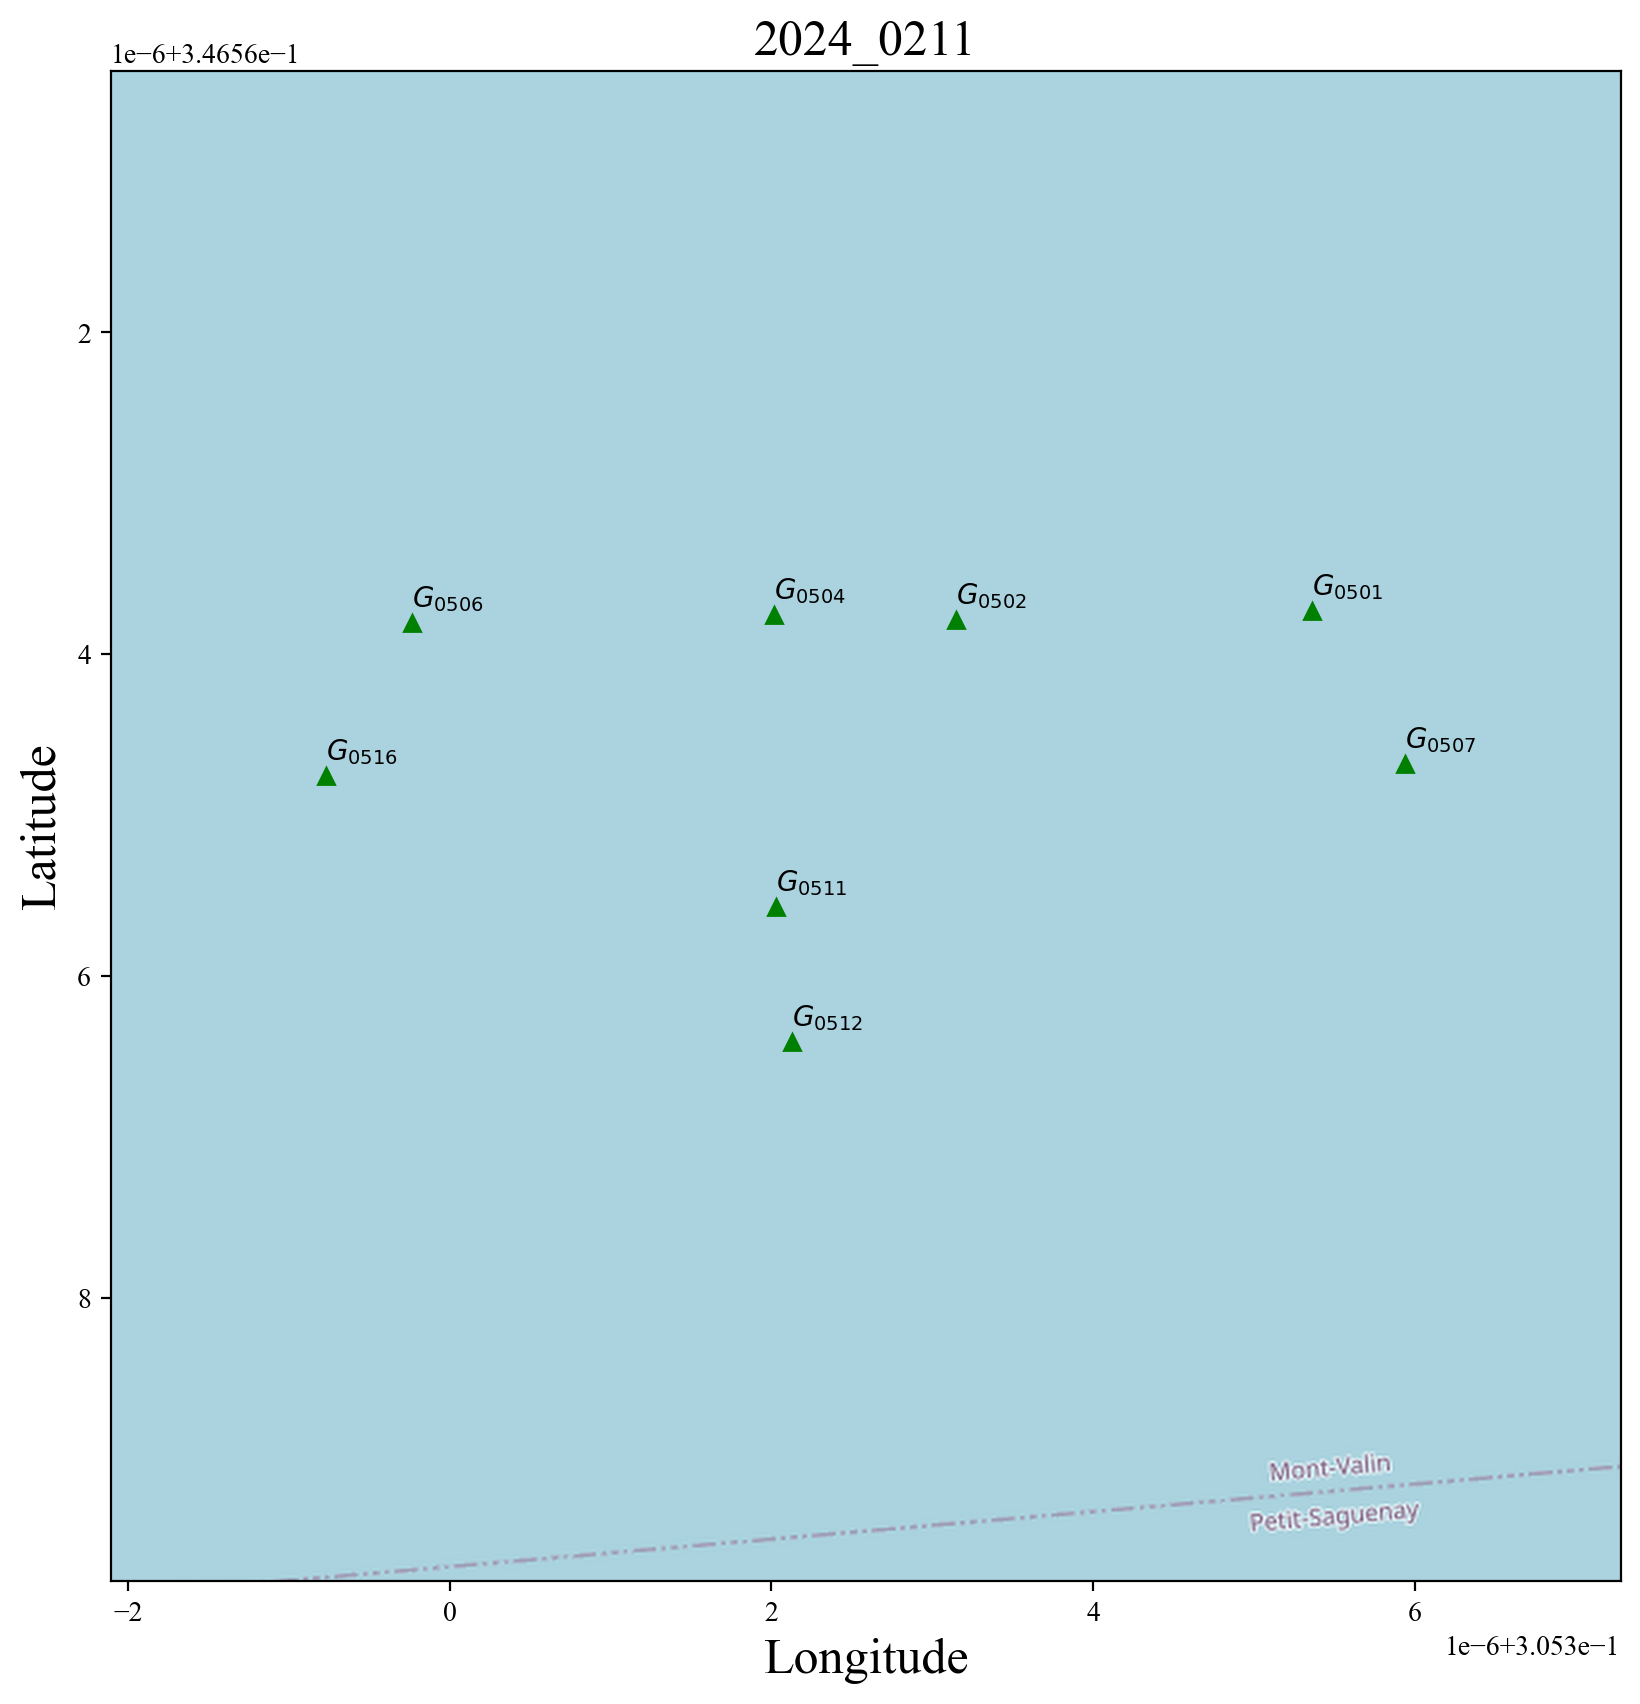

In [57]:
ax,figs = tables.represent_waypoints(gpx,139,146,table=table,date=date)
#graphes.save_figs(figs,savedir=savefolder,prefix='GPS_Geometry_Tomo_Map',suffix='labeled',frmt='pdf',overwrite=False)



In [10]:
print(table)
print(norme)

[[109, 'depart'], [110, 'plot_01'], [111, 'plot_03'], [112, 'plot_02'], [113, 'T_11'], [114, 'B_03'], [114, 'T_13'], [115, 'plot_04'], [118, 'B_02'], [117, 'B_04'], [116, 'borne_00'], [118, 'T_12'], [119, 'S_401'], [120, 'S_402'], [121, 'S_403'], [122, 'S_404'], [123, 'S_405'], [124, 'S_406'], [125, 'S_407'], [126, 'S_408'], [127, 'S_409'], [128, 'S_410'], [129, 'S_411'], [130, 'S_412'], [131, 'S_413'], [132, 'S_414'], [133, 'S_415'], [134, 'S_416'], [135, 'S_417'], [136, 'B_05'], [137, 'B_07'], [138, 'T_09'], [139, 'Tomo_211'], [140, 'Tomo_212'], [141, 'Tomo_204'], [142, 'Tomo_206'], [143, 'Tomo_216'], [144, 'Tomo_207'], [145, 'Tomo_201'], [146, 'Tomo_203'], [147, 'B_01'], [148, 'Canot_01'], [149, 'Canot_02']]
{'depart': 'g*', 'fin': 'g*', 'G': 'g^', 'B': 'mo', 'T': 'rs', 'D': 'kp', 'H': 'bv', 'S': 'bo', 'Tomo': 'g>', 'Quin': 'gv', 'borne': 'ks', 'plot': 'rp', 'R': 'bs', 'Canot': 'yo', 'Frac': 'rx'}


In [84]:
savefolder

'/Users/stephane/Documents/git/icewave/icewave/field/Bicwin2024/Data/2024/0211/GPS/'

['/Users/stephane/Documents/git/icewave/icewave/field/Bicwin2024/Data/2024/0211/GPS/Map_Table_0211_Fracture.txt']
Extent((0.3052971527777777,0.34655760038575845)->(0.3053074,0.34656784760798076) projected as normal)


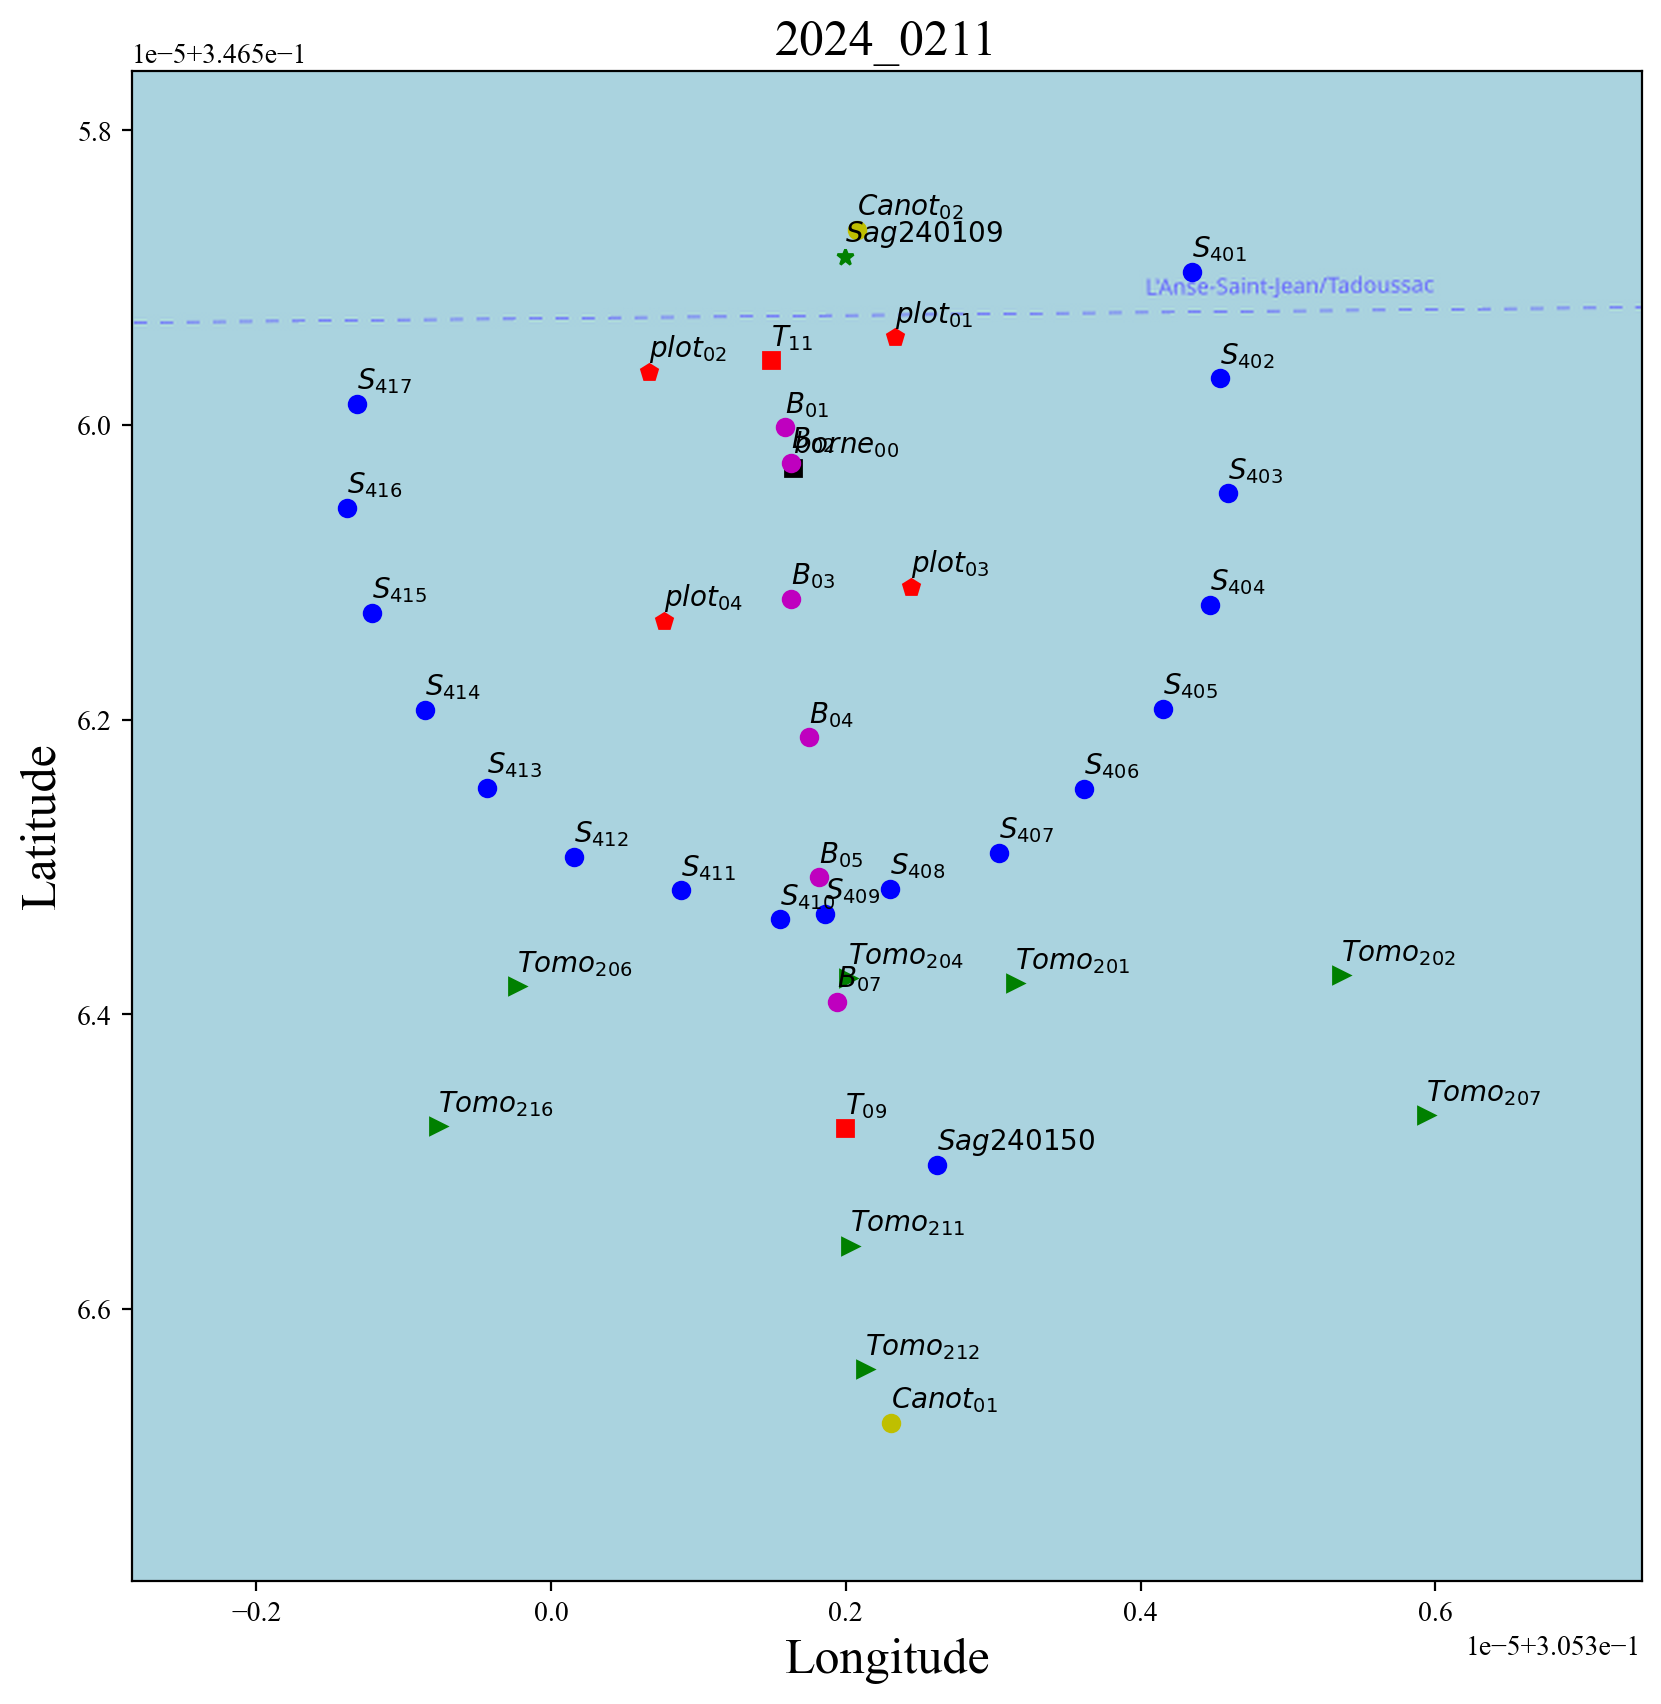

In [261]:
gpx.waypoints[0]

GPXWaypoint(48.365506, -70.697383, elevation=1.292548, time=datetime.datetime(2024, 2, 10, 12, 21, 46, tzinfo=SimpleTZ("Z")), name='Sag240063', symbol='Flag, Blue')

[['#', 'X', 'Y', 'Z'], ['G_101', 0, 0, 0], ['G_102', 3, 0, 0], ['G_103', 6, 0, 0], ['G_104', 9, 0, 0], ['G_105', 12, 0, 0], ['G_106', 15, 0, 0], ['G_107', 18, 0, 0], ['G_108', 21, 0, 0], ['G_109', 24, 0, 0], ['G_110', 27, 0, 0], ['G_111', 30, 0, 0], ['G_112', 33, 0, 0], ['G_113', 36, 0, 0], ['G_114', 39, 0, 0], ['G_115', 42, 0, 0], ['G_116', 45, 0, 0], ['S_101', -5, 0, 0], ['S_102', -8, 0, 0], ['S_103', -11, 0, 0], ['S_104', 50, 0, 0], ['S_105', 53, 0, 0], ['S_106', 56, 0, 0]]
[['#', 'X', 'Y', 'Z'], ['G_201', 0, 0, 0], ['G_202', 0, -3, 0], ['G_203', 0, -6, 0], ['G_204', 0, -9, 0], ['G_205', 0, -12, 0], ['G_206', 0, -15, 0], ['G_207', 0, -18, 0], ['G_208', 0, -21, 0], ['G_209', 0, -24, 0], ['G_210', 0, -27, 0], ['G_211', 0, -30, 0], ['G_212', 0, -33, 0], ['G_213', 0, -36, 0], ['G_214', 0, -39, 0], ['G_215', 0, -42, 0], ['G_216', 0, -45, 0], ['S_201', 0, 5, 0], ['S_202', 0, 8, 0], ['S_203', 0, 11, 0], ['S_204', 0, -50, 0], ['S_205', 0, -53, 0], ['S_206', 0, -56, 0]]
[['#', 'X', 'Y', 'Z']

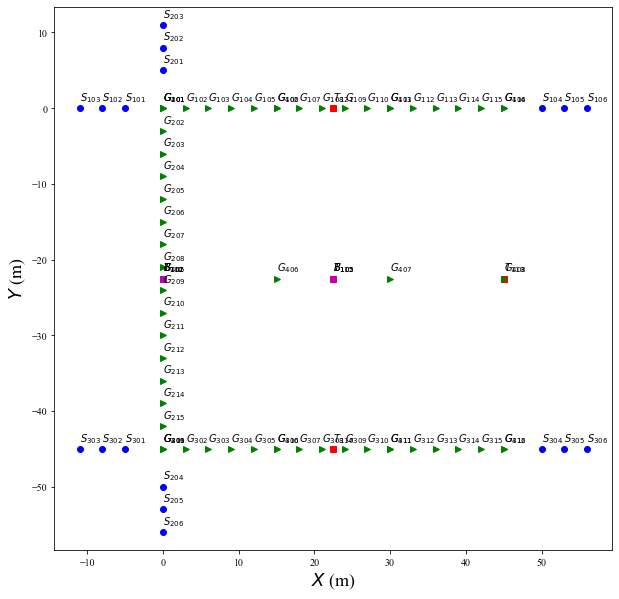

In [56]:
import icewave.geometry.experiment_2024_0211 as experiment

base = '/Users/stephane/Documents/git/icewave/icewave/field/Bicwin2024/Data/'
date = '2024_0211'
datesave=date.replace('_','/')

figs,geom = experiment.Sag24_0211()
graphes.save_figs(figs,savedir=savefolder,prefix='geometry_'+date,suffix='_general',overwrite=True)
#print(figs)

In [287]:
geom

[['#', 'X', 'Y', 'Z'],
 ['G_01', 0, 0, 0],
 ['G_02', 3, 0, 0],
 ['G_03', 6, 0, 0],
 ['G_04', 9, 0, 0],
 ['G_05', 12, 0, 0],
 ['G_06', 15, 0, 0],
 ['G_07', 18, 0, 0],
 ['G_08', 21, 0, 0],
 ['G_09', 24, 0, 0],
 ['G_10', 27, 0, 0],
 ['G_11', 30, 0, 0],
 ['G_12', 33, 0, 0],
 ['G_13', 36, 0, 0],
 ['G_14', 39, 0, 0],
 ['G_15', 42, 0, 0],
 ['G_16', 45, 0, 0],
 ['S_101', -5, 0, 0],
 ['S_102', -8, 0, 0],
 ['S_103', -11, 0, 0],
 ['S_104', 50, 0, 0],
 ['S_105', 53, 0, 0],
 ['S_106', 56, 0, 0],
 ['G_01', 0, 0, 0],
 ['G_02', 0, -3, 0],
 ['G_03', 0, -6, 0],
 ['G_04', 0, -9, 0],
 ['G_05', 0, -12, 0],
 ['G_06', 0, -15, 0],
 ['G_07', 0, -18, 0],
 ['G_08', 0, -21, 0],
 ['G_09', 0, -24, 0],
 ['G_10', 0, -27, 0],
 ['G_11', 0, -30, 0],
 ['G_12', 0, -33, 0],
 ['G_13', 0, -36, 0],
 ['G_14', 0, -39, 0],
 ['G_15', 0, -42, 0],
 ['G_16', 0, -45, 0],
 ['S_201', 0, 5, 0],
 ['S_202', 0, 8, 0],
 ['S_203', 0, 11, 0],
 ['S_204', 0, -50, 0],
 ['S_205', 0, -53, 0],
 ['S_206', 0, -56, 0],
 ['G_01', 0, -45, 0],
 ['G_02', 

In [293]:
import icewave.geometry.save as geom_save

filename = savefolder + 'Geom_table.txt'

#pprint(geom)

geom_save.save(geom,filename)